In [1]:
import pandas as pd # Pandas provides dataframes which are basicly spreadsheets. 
import numpy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # For clustering.
from sklearn.decomposition import PCA # For dimensionality reduction.
from sklearn.preprocessing import StandardScaler

In [2]:
# This is a RITA beaconing analysis report.
# It was chosen as visualizing it requires dimensionality reduction. 
raw_data = pd.read_csv("beacons.csv", index_col=False)

In [3]:
# Here we can see the very spreadsheet-like structure of a dataframe
raw_data.head()

,Class,Score,Source,Destination,Connections,Avg. Bytes,Intvl. Range,Size Range,Intvl. Mode,Size Mode,Intvl. Mode Count,Size Mode Count,Intvl. Skew,Size Skew,Intvl. Dispersion,Size Dispersion,TS Duration
0,0,0.947,192.168.1.175,239.255.255.250,403,0.000,1,0,120,0,398,403,0.000,0.0,0,0,0.684
1,0,0.946,192.168.1.10,224.0.0.252,297,144.444,188,48,189,148,194,275,0.000,0.0,0,0,0.681
2,0,0.900,192.168.1.172,192.168.1.175,125,1343.376,14885,684,120,1368,67,117,0.000,0.0,0,0,0.422
3,0,0.900,192.168.1.172,192.168.1.10,157,1124.694,14994,1085,120,1368,79,117,0.000,0.0,0,0,0.420
4,0,0.858,192.168.1.175,209.177.145.40,45,74.311,61,0,1060,0,4,45,-0.143,0.0,11,0,0.659


In [4]:
# Drop everything that isn't a number or that doesn't make sense to visualize 
raw_data = raw_data.drop('Source', axis=1)
raw_data = raw_data.drop('Destination', axis=1)
raw_data = raw_data.drop('Class', axis=1)
raw_data = raw_data.drop('Score', axis=1)

In [5]:
raw_data.head()

,Connections,Avg. Bytes,Intvl. Range,Size Range,Intvl. Mode,Size Mode,Intvl. Mode Count,Size Mode Count,Intvl. Skew,Size Skew,Intvl. Dispersion,Size Dispersion,TS Duration
0,403,0.000,1,0,120,0,398,403,0.000,0.0,0,0,0.684
1,297,144.444,188,48,189,148,194,275,0.000,0.0,0,0,0.681
2,125,1343.376,14885,684,120,1368,67,117,0.000,0.0,0,0,0.422
3,157,1124.694,14994,1085,120,1368,79,117,0.000,0.0,0,0,0.420
4,45,74.311,61,0,1060,0,4,45,-0.143,0.0,11,0,0.659


In [6]:
# Both k-means and PCA require scaled data.
scaled_data = StandardScaler().fit_transform(raw_data)

/home/dioberne/Sandbox/BloomCon/env/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/dioberne/Sandbox/BloomCon/env/local/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
# K-Means was chosen for this demo as it is the most commonly seen clustering algorithm. 
# K-Means requires you to tell it the correct number of clusters. 
# This is a catch 22 as you can't know the correct number ahead of time.
# A way around this is to guess and then revise after seeing the results. 
# A better option is to use a better clutering algorithm like DBSCAN. 
clusters =  KMeans(n_clusters=4).fit_predict(scaled_data)

In [8]:
# PCA was chosen for this demo as it is the most commonly seen dimensionality reduction algorithm. 
# PCA re-measures your data points at angles through the data that account for the most information. 
principal_components = pca = PCA(n_components=2).fit_transform(scaled_data)

In [9]:
# Boilerplate for colors and visualization. 
unique_labels = set(clusters)

In [10]:
colors = [plt.cm.Spectral(each) for each in numpy.linspace(0, 1, len(unique_labels))]

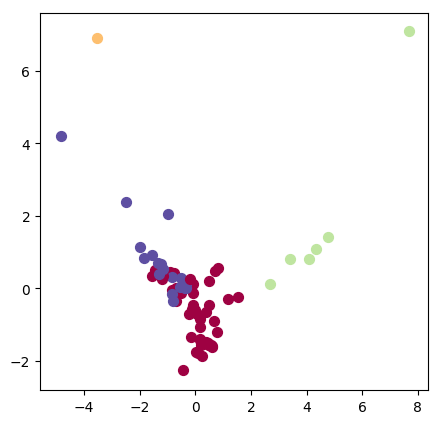

In [11]:
fig=plt.figure(figsize=(5, 5), dpi=100, facecolor='w', edgecolor='k')
for item, prediction in zip(principal_components, clusters):
    color = colors[prediction]    
    plt.scatter(item[0], item[1], c=[color], s=50)
    
plt.show()

# We can see here a weakness of K-Means. 
# Several of the points are isolated but still considered to be in the nearest cluster. 
# K-Means has no way to identify anomalies (points that don't belong to a cluster). 